In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from matplotlib.colors import ListedColormap
from sklearn.model_selection import GridSearchCV

### 1. Importantando as bases

- Separando em treino, teste e validacao
- Bases enviadas através do grupo

In [8]:
treino = pd.read_csv(
    'C:\\Users\\Notebook\\OneDrive\\Documents\\Faculdade\\Nono Período\\Aprendizado de máquina\\Atividades\\Projeto ML AV2\\Projeto-ML-KNN\\treino.csv', sep=',')
teste = pd.read_csv(
    'C:\\Users\\Notebook\\OneDrive\\Documents\\Faculdade\\Nono Período\\Aprendizado de máquina\\Atividades\\Projeto ML AV2\\Projeto-ML-KNN\\teste.csv', sep=',')
validacao = pd.read_csv(
    'C:\\Users\\Notebook\\OneDrive\\Documents\\Faculdade\\Nono Período\\Aprendizado de máquina\\Atividades\\Projeto ML AV2\\Projeto-ML-KNN\\validacao.csv', sep=',')

# dividindo a base em treino(70%) teste(15%) e validacao(15%)
X_train = treino.drop(columns=['RATING'])
y_train = treino['RATING']

X_test = teste.drop(columns=['RATING'])
y_test = teste['RATING']

X_val = validacao.drop(columns=['RATING'])
y_val = validacao['RATING']


### 2. Aplicando normalizacao

- Alguns dados não vieram normalizados, logo, para o modelo de knn que se baseia na distância entre os vizinhos, dados não normalziados são um problema.

In [9]:
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)
X_val = pd.DataFrame(scaler.fit_transform(X_val), columns=X_val.columns)

### 3. Instanciando o KNN e avaliando o modelo

- Precisão com os dados de treino deve ser levemente maior se ocmparada aos dados de teste
- Preciso entender porque o resultado foi menor com os de validação


In [10]:

knn = KNeighborsClassifier(
    n_neighbors=5,
    weights='distance',
    algorithm='auto',
    metric='euclidean',
    p=2
)

knn.fit(X_train, y_train)
print(f"Precisao usando os dados de treino: {knn.score(X_train, y_train)}")
print(f"Precisao como os dados de validacao: {knn.score(X_val, y_val)}")
print(f"Precisao como os dados de teste: {knn.score(X_test, y_test)}")


Precisao usando os dados de treino: 1.0
Precisao como os dados de validacao: 0.8209408194233687
Precisao como os dados de teste: 0.9212121212121213


- Validação Cruzada

In [11]:
# concatenando dados para usar na validacao cruzada
features = pd.concat([X_train, X_test, X_val], axis=0)
target = pd.concat([y_train, y_test, y_val], axis=0)
print(cross_val_score(knn, features, target, cv=8))

[0.90727273 0.91636364 0.90545455 0.90363636 0.90163934 0.92531876
 0.91803279 0.90528233]


- Matriz de confusão



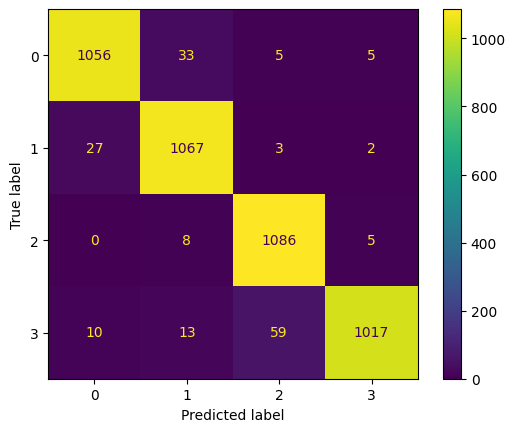

In [12]:
y_preds = knn.predict(X_test)
# print(f"Matriz de confusao: {confusion_matrix(y_test, y_preds)}")
#mostrando melhor a matriz de confusao
# print(pd.crosstab(y_test, y_preds, rownames=["Rotulo verdadeiro"], colnames=["Rotulo predito"]))
ConfusionMatrixDisplay.from_estimator(estimator=knn, X=features, y=target)

- Acuracaia
- F1 score
- Precision
- Recall

*Observa-se que usando os dados de validação o desempenho do modelo é menor do que quando usados os dados de teste*

In [13]:
knn.fit(X_train,y_train)
#predicao com o conjunto de validação
y_preds = knn.predict(X_val)

print(f"Acuracia: {accuracy_score(y_val, y_preds)}")
print(f"F1-Score: {f1_score(y_val, y_preds, average=None)}")
print(f"Precision: {precision_score(y_val, y_preds, average=None)}")
print(f"Recall: {recall_score(y_val, y_preds, average=None)}")



Acuracia: 0.8209408194233687
F1-Score: [0.87428571 0.85714286 0.82077922 0.70895522]
Precision: [0.86931818 0.83850932 0.71818182 0.93137255]
Recall: [0.87931034 0.87662338 0.95757576 0.57228916]


- Curva ROC

In [14]:
#Treinar o modelo KNN 
knn2 = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=3))
knn2.fit(X_train,y_train)

# fazendo previsão do resultado ser uma das classes target
y_probs = knn2.predict_proba(X_test)
# pega apenas a probabilidade de ser da classe da coluna 1, ou seja, rating B da divida
y_probs_positive = y_probs[:, 1]
#numero de classes
num_classes = 4
#define os dicionarios
fpr = {} 
tpr = {} 
roc_auc = {}
#binarizando y_teste para que se torne uma matriz 2D
y_test = label_binarize(y_test, classes=[0, 1, 2, 3])
y_test


array([[0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       ...,
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0]])

In [15]:
y_probs

array([[0.        , 0.        , 0.33333333, 0.66666667],
       [1.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        ],
       ...,
       [0.33333333, 0.66666667, 0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        ]])

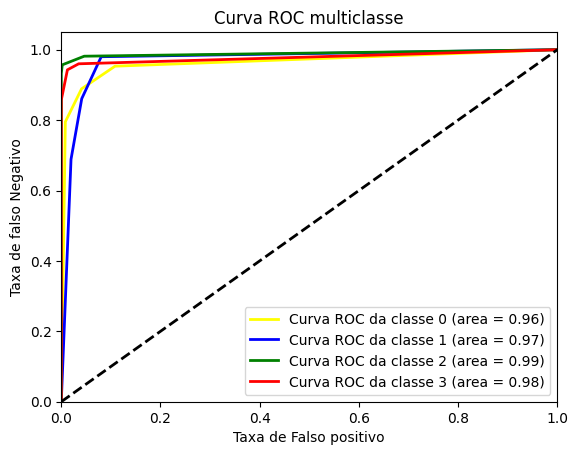

In [16]:
for i in range(num_classes):
    fpr[i], tpr[i], treshold = roc_curve(y_test[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# plot da curva
plt.figure()
colors = ['yellow', 'blue', 'green', 'red']
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='Curva ROC da classe {0} (area = {1:0.2f})'
                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso positivo')
plt.ylabel('Taxa de falso Negativo')
plt.title('Curva ROC multiclasse')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# # Função para plotar os resultados
# def plot_results(X_test, y_test, y_pred, title):
#     plt.figure(figsize=(8, 6))
#     plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='o', cmap='coolwarm', label='Real', alpha=0.6)
#     plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, marker='x', cmap='coolwarm', label='Previsto', alpha=0.8)
#     plt.title(title)
#     plt.xlabel('Mean radius')
#     plt.ylabel('Mean texture')
#     plt.legend(loc='upper right')
#     plt.show()

# plot_results(X_test, y_test, y_probs, "KKN")


### 4. Tunando os hiperparâmetros

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Defina o modelo
knn = KNeighborsClassifier()

# Defina o espaço de busca dos hiperparâmetros
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11,13],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'weights': ['uniform', 'distance']
    # 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Realize o Grid Search com validação cruzada
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Melhor combinação de hiperparâmetros
print("Melhores hiperparâmetros:", grid_search.best_params_)
print("Melhor acurácia:", grid_search.best_score_)

knn2 = KNeighborsClassifier(n_neighbors=7,
    weights='distance',
    metric='manhattan')

knn2.fit(X_train,y_train)
#predicao com o conjunto de validação
y_preds = knn2.predict(X_val)

print(f"Acuracia: {accuracy_score(y_val, y_preds)}")
print(f"F1-Score: {f1_score(y_val, y_preds, average=None)}")
print(f"Precision: {precision_score(y_val, y_preds, average=None)}")
print(f"Recall: {recall_score(y_val, y_preds, average=None)}")



Melhores hiperparâmetros: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Melhor acurácia: 0.9060817231548939
Acuracia: 0.8254931714719271
F1-Score: [0.88252149 0.87261146 0.81558442 0.71111111]
Precision: [0.88       0.85625    0.71363636 0.92307692]
Recall: [0.88505747 0.88961039 0.95151515 0.57831325]
